<a href="https://colab.research.google.com/github/tanisha1112/ECE_792_Assignments/blob/main/ECE_792_HW5_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk bs4 keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import gutenberg
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import re

In [ ]:
# download corpus
nltk.download('gutenberg')
nltk.download('stopwords')
corpus = nltk.corpus.gutenberg.raw('austen-sense.txt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus

In [ ]:
def denoise_text(text):
    # remove html strips
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # replace \n with space
    text = re.sub('\n', ' ', text)
    # remove square brackets
    text = re.sub(r'\[[^\]]*\]', ' ', text)
    # replace punctuation with space
    text = re.sub(r'[,.;@#?!&$\-]+\ *', ' ', text, flags=re.VERBOSE)
    # remove special characters
    text = re.sub(r'[^\w\s]', ' ', text)
    # replace extra spaces with single space
    text = re.sub(' +', ' ', text)
    return text.lower().strip()

In [ ]:
corpus = denoise_text(corpus)

In [ ]:
words = corpus.split(' ')

In [ ]:
a = np.array(words)
_, idx = np.unique(a, return_index=True)
unique_words = a[np.sort(idx)]
unique_words

array(['chapter', '1', 'the', ..., 'ranked', 'disagreement', 'producing'],
      dtype='<U17')

In [ ]:
vocab_size = len(unique_words)
vocab_size

6330

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(unique_words)
word_to_int = tokenizer.word_index

In [ ]:
n = 6
ngrams = []

for i in range(len(unique_words) - n):
    ngram = unique_words[i:i + n]
    ngrams.append((ngram[:5], ngram[5]))

In [ ]:
ngrams

In [ ]:
X = []
Y = []

for input_text, output_text in ngrams:
    X.append([word_to_int[word] for word in input_text])
    Y.append(word_to_int[output_text])

In [ ]:
X = np.array(X)
Y = to_categorical(Y, num_classes=vocab_size)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=5))
model.add(LSTM(256))
model.add(Dropout(0.1))
model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 20

history = model.fit(X, Y, batch_size=batch_size, epochs=epochs)

Epoch 1/20
50/50 [==============================] - 16s 236ms/step - loss: 8.7620 - accuracy: 0.0000e+00
Epoch 2/20
50/50 [==============================] - 11s 229ms/step - loss: 8.7502 - accuracy: 0.0016
Epoch 3/20
50/50 [==============================] - 7s 128ms/step - loss: 8.7349 - accuracy: 0.0013
Epoch 4/20
50/50 [==============================] - 7s 137ms/step - loss: 8.5963 - accuracy: 7.9064e-04
Epoch 5/20
50/50 [==============================] - 5s 108ms/step - loss: 8.3477 - accuracy: 0.0000e+00
Epoch 6/20
50/50 [==============================] - 5s 103ms/step - loss: 7.9546 - accuracy: 0.0016
Epoch 7/20
50/50 [==============================] - 7s 139ms/step - loss: 7.2004 - accuracy: 0.0142
Epoch 8/20
50/50 [==============================] - 5s 107ms/step - loss: 6.1327 - accuracy: 0.0963
Epoch 9/20
50/50 [==============================] - 7s 141ms/step - loss: 5.0182 - accuracy: 0.3512
Epoch 10/20
50/50 [==============================] - 5s 104ms/step - loss: 3.9730 - ac

In [ ]:
# Generate text using the model
start = 'his natural shyness was overcome'
for i in range(100):
    # Tokenize the start sequence
    tokens = start.split()
    if len(tokens) < n-1:
        break
    # Pad the tokens to a fixed length
    tokens = pad_sequences([tokenizer.texts_to_sequences([start])[0]], maxlen=5)
    # Predict the next word
    prediction = model.predict(tokens)
    word_index = np.argmax(prediction)
    # Convert the predicted word index to the actual word
    word = ''
    for w, i in tokenizer.word_index.items():
        if i == word_index:
            word = w
            break
    # Add the predicted word to the start sequence
    start += ' ' + word

In [ ]:
start

'his natural shyness was overcome sister education longed norland see explained fine figure for figure hold parliament connected so forego shame attained quieted to mab interests turn barouches mamma christian recently fortunately younger meet assurances befall engaged stole grave fat assent disturb seclusion disposition dinner terminated contrast travelled yet permitting size sentiment imputed abilities strongest feet took affectionate eager gun unavoidable reserve grateful generous hasty show regard mindful strikingly keeping told militated secret misconduct betraying motive warm frank pangs jacket wholly forward action heighten allowed shewn happy guide maid their attend meet sleepless permit across effort grave pictured intervals window cards striking reproaches fat stew'

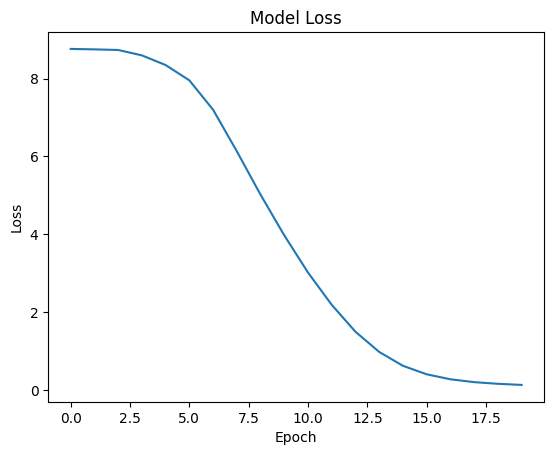

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()